In [7]:
import easyocr
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2

def detect_tables(result, y_threshold=10):
    """
    Detecta posibles tablas en el resultado de EasyOCR basado en la alineación vertical de los bounding boxes.
    
    :param result: Resultado de easyocr.Reader.readtext.
    :param y_threshold: Umbral de diferencia en y para considerar que dos textos están en la misma fila.
    :return: Lista de tablas detectadas, cada tabla es una lista de filas, y cada fila es una lista de palabras.
    """
    lines = []
    current_line = []
    last_y = None
    
    for (box, text, prob) in result:
        # Obtener la coordenada y del centro del bounding box
        y_center = np.mean([oint[1] for oint in box])
        if last_y is None or abs(y_center - last_y) < y_threshold:
            current_line.append((box, text, prob))
        else:
            lines.append(current_line)
            current_line = [(box, text, prob)]
        last_y = y_center
    
    if current_line:
        lines.append(current_line)
    
    return lines

def group_texts_by_proximity(result, max_distance=20):
    """
    Agrupa las palabras basadas en la proximidad de sus bounding boxes.
    
    :param result: Resultado de easyocr.Reader.readtext.
    :param max_distance: Distancia máxima en píxeles para considerar que dos palabras están en el mismo grupo.
    :return: Lista de grupos de palabras.
    """
    def distance(box1, box2):
        """
        Calcula la distancia entre dos bounding boxes.
        """
        center1 = np.mean(box1, axis=0)
        center2 = np.mean(box2, axis=0)
        return np.linalg.norm(center1 - center2)
    
    groups = []
    for (box, text, prob) in result:
        added = False
        for group in groups:
            if any(distance(box, gbox) < max_distance for gtext, gbox, gprob in group):
                group.append((text, box, prob))
                added = True
                break
        if not added:
            groups.append([(text, box, prob)])
    
    return groups

# Configurar el lector de EasyOCR
time_start = time.time()

reader = easyocr.Reader(['en'], gpu=True)
time_end = time.time() - time_start

print(f"Tiempo de ejecución: {time_end} s")


Tiempo de ejecución: 1.5466926097869873 s


In [41]:


# Leer la imagen


result = reader.readtext('facturas/1c67acf5-7c45-490d-a798-72051f431b38.jpg',
                          paragraph=True)


# Imprimir textos resultantes

for (box, text) in result:
    print(text)
   




FACTURA
Datos del cliente:
CIF: rrN313YMM454 Correo: monicaabad@hotmail.com N' FACTURA:104614 Telf: +34944 6154 97 Canada de Nydia Hernandez 9 Teruel, 04032   FECHA: 2024-05-19 Nombre: Dominga Atienza Gutierrez
Descripcion |  Cantidad| TOTAL
embrace distributed platforms | 10 | 818.60
brand BZB synergies | 7 | 512.96
Forma de pago:Bank Transfer Subtotal: 1331.56 VAT (16%): 213.05 TOTAL: 1544.61
Datos del Emisor:
CIF: GWu3745aj962 Correo: cozaramando@tello.es Telf: +34959860239 C.Alejo Puig 33 Puerta 1 Cadiz, 27672 Nombre: Bravoy Flor S.LN.E


In [50]:
# Mostrar la imagen con los bounding boxes
image = cv2.imread('facturas/1c67acf5-7c45-490d-a798-72051f431b38.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')

for (box, text) in result:
    # Extraer las coordenadas de los puntos del bounding box
    box = np.array(box).astype(int)
    # Dibujar el bounding box
    cv2.polylines(image, [box], isClosed=True, color=(0, 255, 0), thickness=2)
    # Dibujar el texto
    cv2.putText(image, text, (box[0][0], box[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.imshow(image)
plt.show()
    

[ WARN:0@3056.582] global loadsave.cpp:248 findDecoder imread_('facturas/1c67acf5-7c45-490d-a798-72051f431b38.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [70]:
#Prueba con todas las imagenes del directorio facturas
import os
import easyocr
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2


files = os.listdir('facturas')


print(files)



['imagen9.jpg', 'imagen17.jpg', 'imagen3.jpg', 'imagen10.jpg', 'imagen8.jpg', 'imagen13.jpg', 'imagen6.jpg', 'imagen5.jpg', 'imagen7.jpg', 'imagen16.jpg', 'imagen1.jpg', 'imagen14.jpg', 'imagen18.jpg', 'imagen11.jpg', 'imagen4.jpg', 'imagen15.jpg', 'imagen12.jpg', 'imagen2.jpg']


Texto de la imagen imagen9.jpg
Rambla de Nazaret Pi11 Alicante, 20258 +34845474950 bravovito@hnos.es MHP291lsl746
Menendezy asociadosSA
Client Details: Ligia Huguet-Llanos Acceso de Dafne Gabaldon 9 Castellon, 47670 +34825461131 adoracion68@gmail.com TEL3I8ErH148
INVOICE NO: DATE:
918581 2024-05-07
QUANTITY
DESCRIPTION
UNIT PRICE
TOTAL
9
iterate one-to-one interfaces
81.90
737.10
6
transform clicks-and-mortar niches
83.49
500.94
10
optimize end-to-end partnerships
56.27
562.70
Subtotal: VAT 16%: TOTAL:
1800.74 288.12 2088.86
Texto de la imagen imagen17.jpg
Fabrica Bastida S.L: C.de Margarita Amat 3 Cadiz, 28102 +34927870399 celestinovillar@distribuciones.com XYp75ZIAs051
Cliente: Rocio Echeverria Vilar Alameda de Jose Ramon Mendizabal 320 Piso 8 Granada, 36663 +34926571490 silviaO8@yahoo.com VgF24Znpo231
No FACTURA: FECHA: PAGADO CON:
894228 2024-05-05 Bank Transfer
CANTIDAD
DESCRIPCION
PRECIO UNITARIO
TOTAL
7
re-intermediate user-centric methodologies
22.28
155.96
Subtotal: VAT (16): 

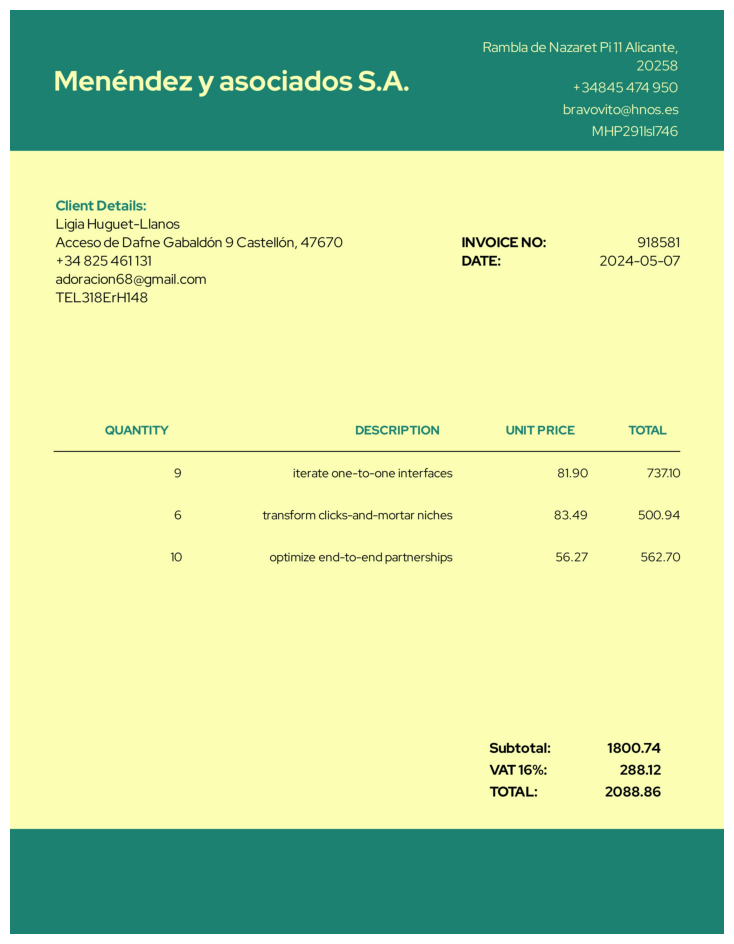

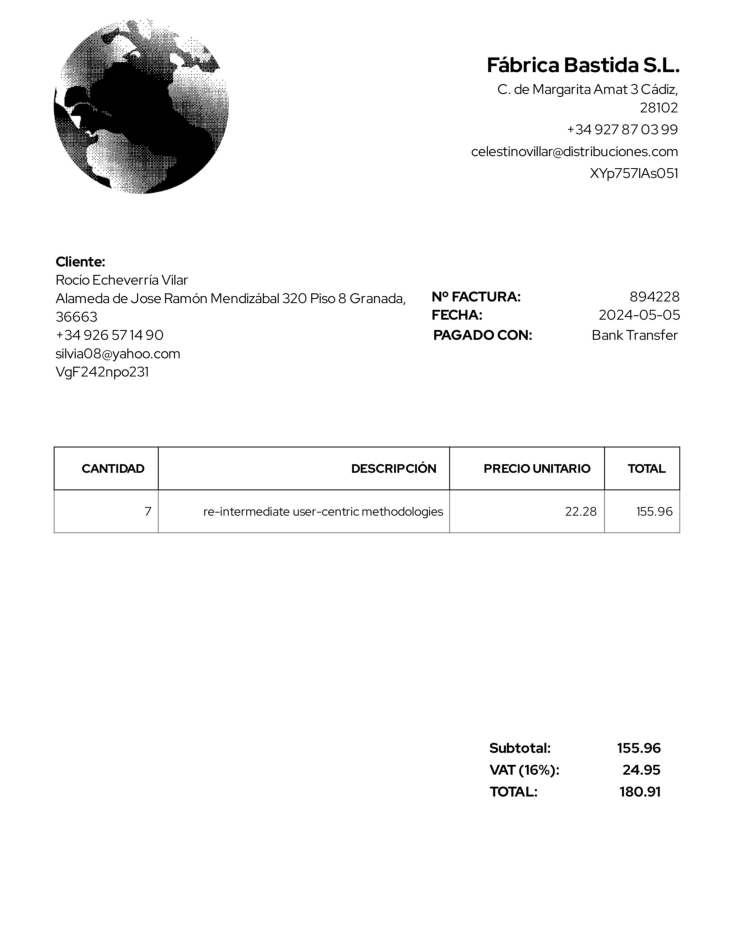

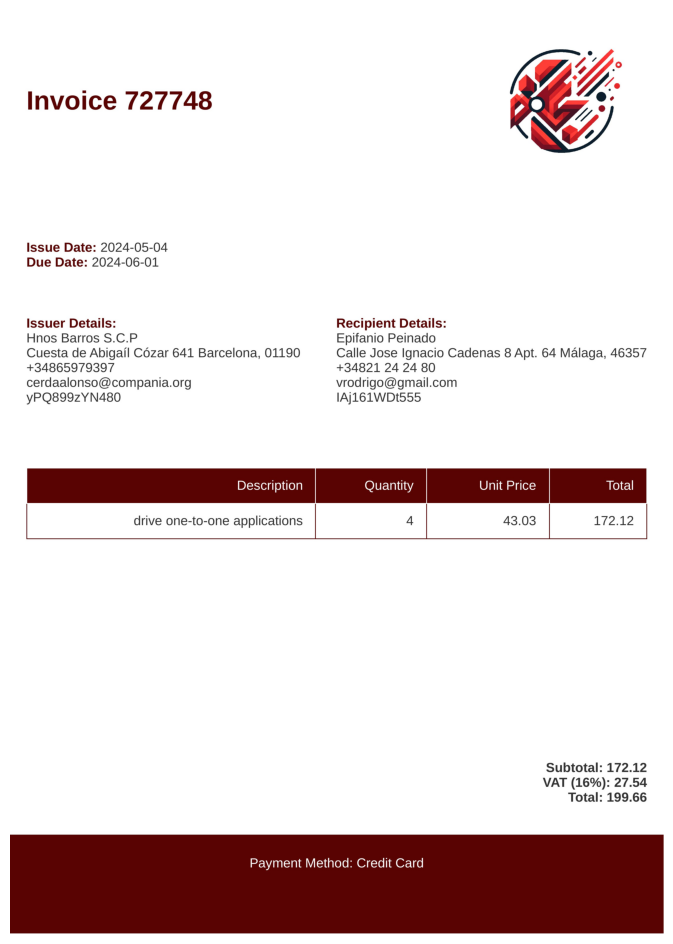

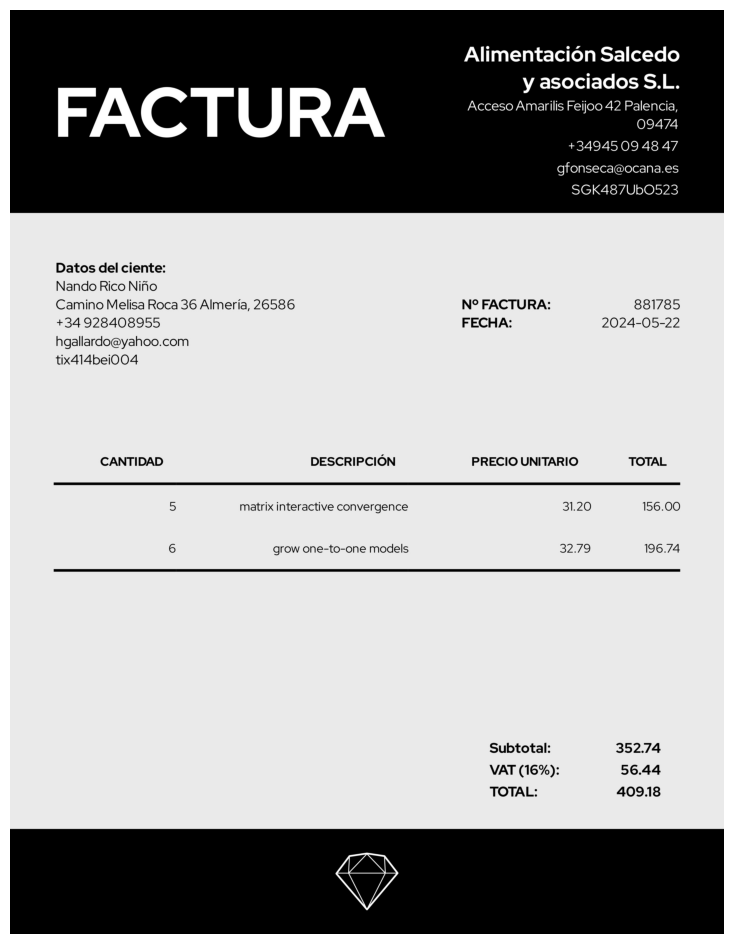

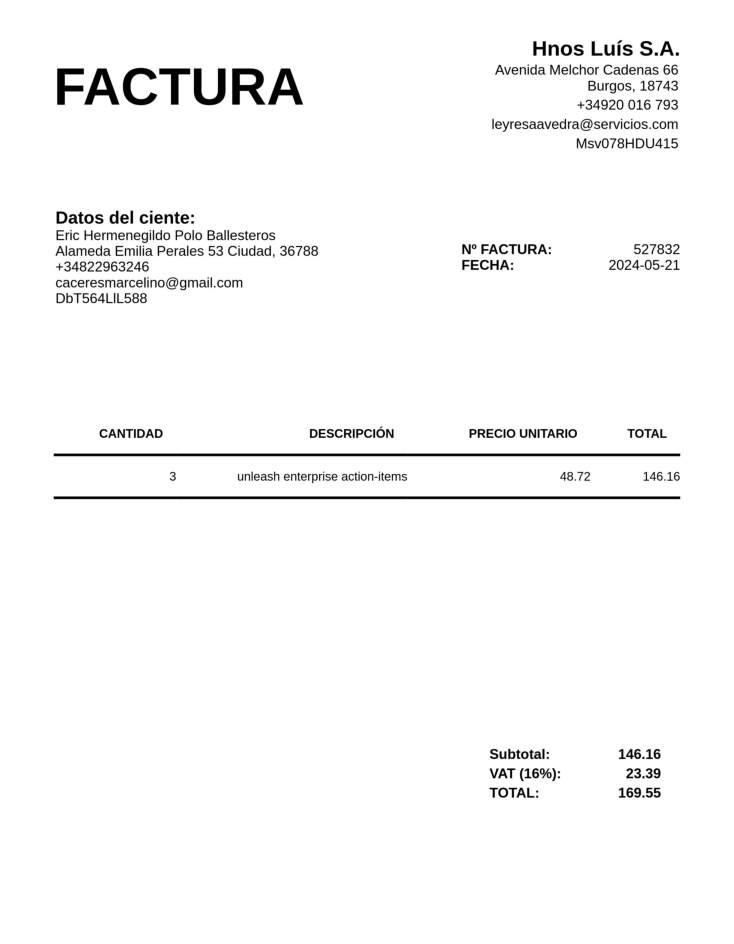

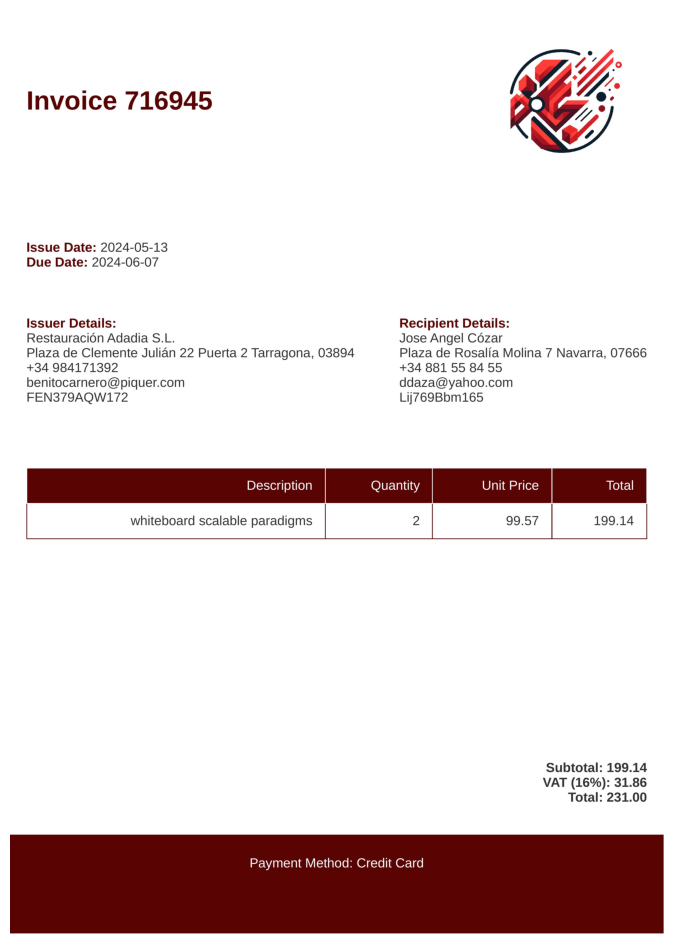

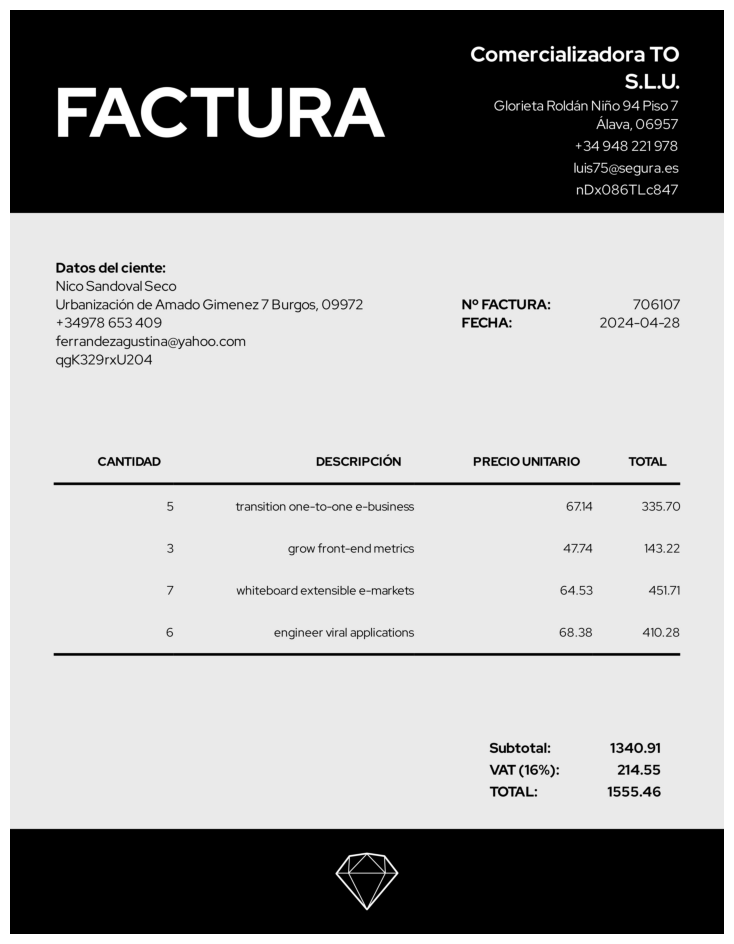

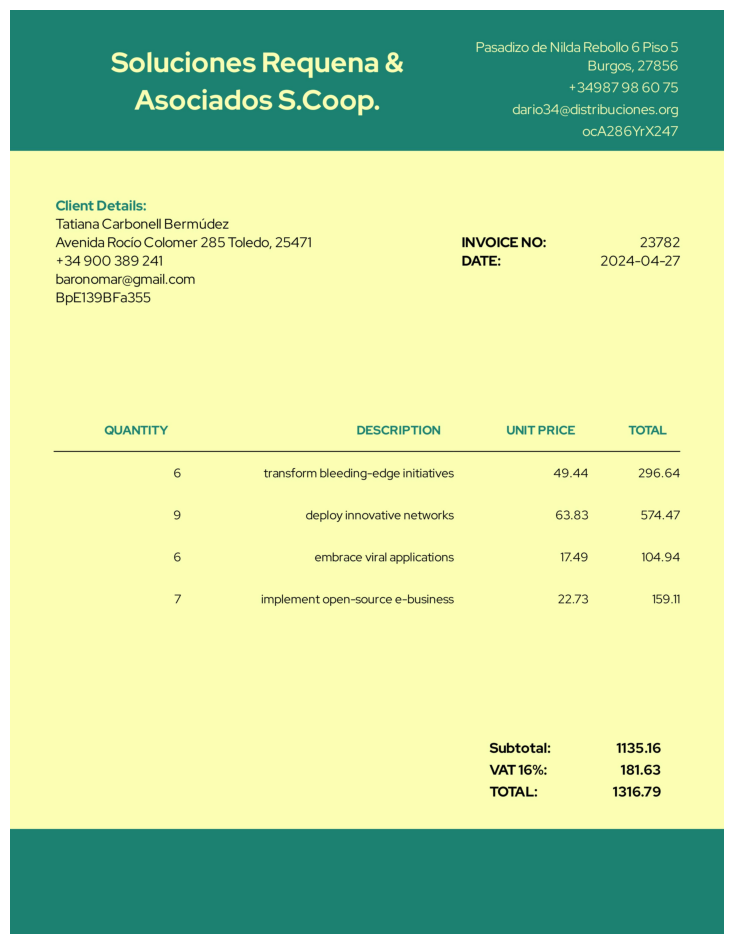

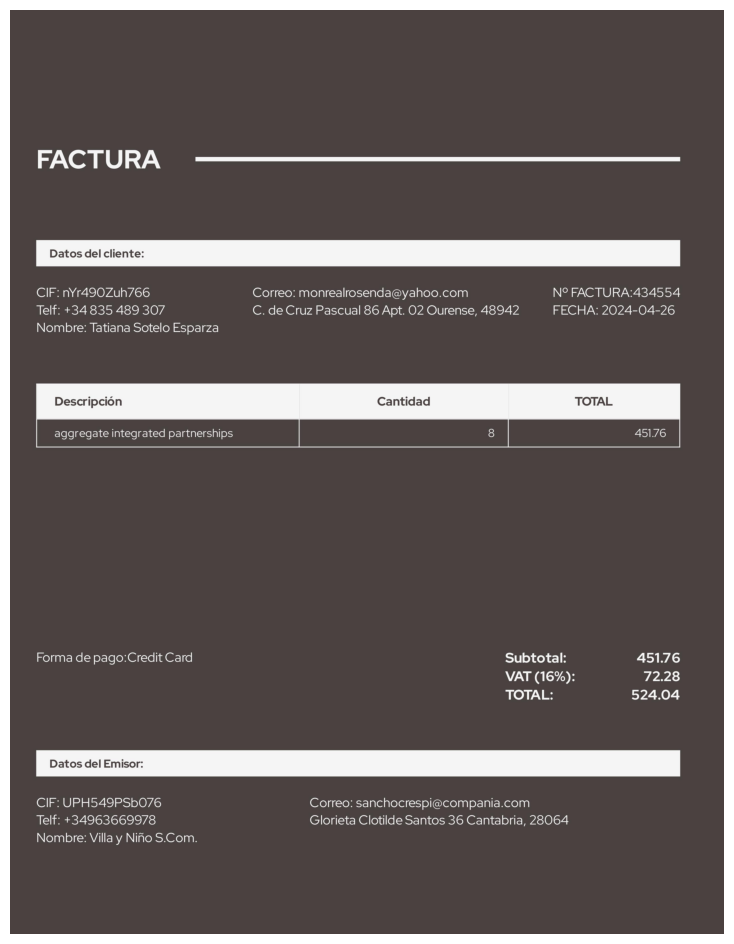

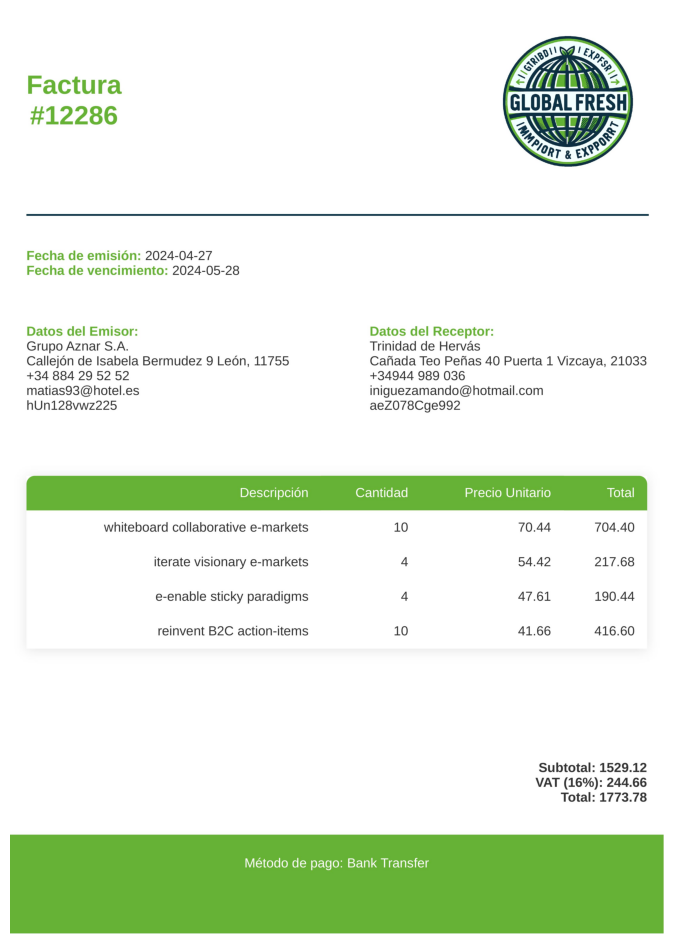

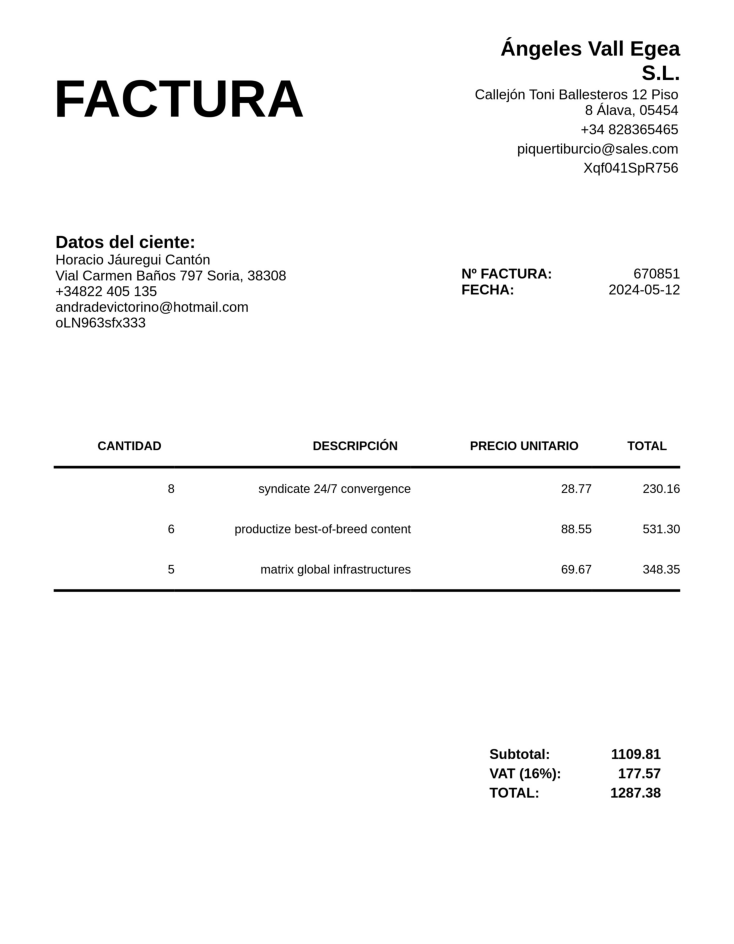

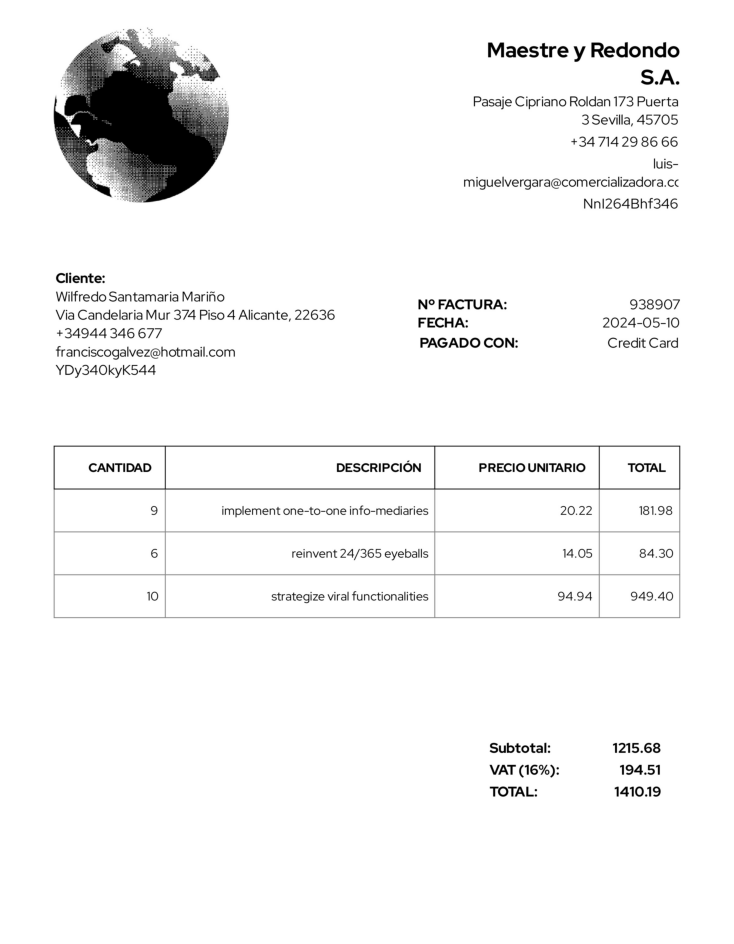

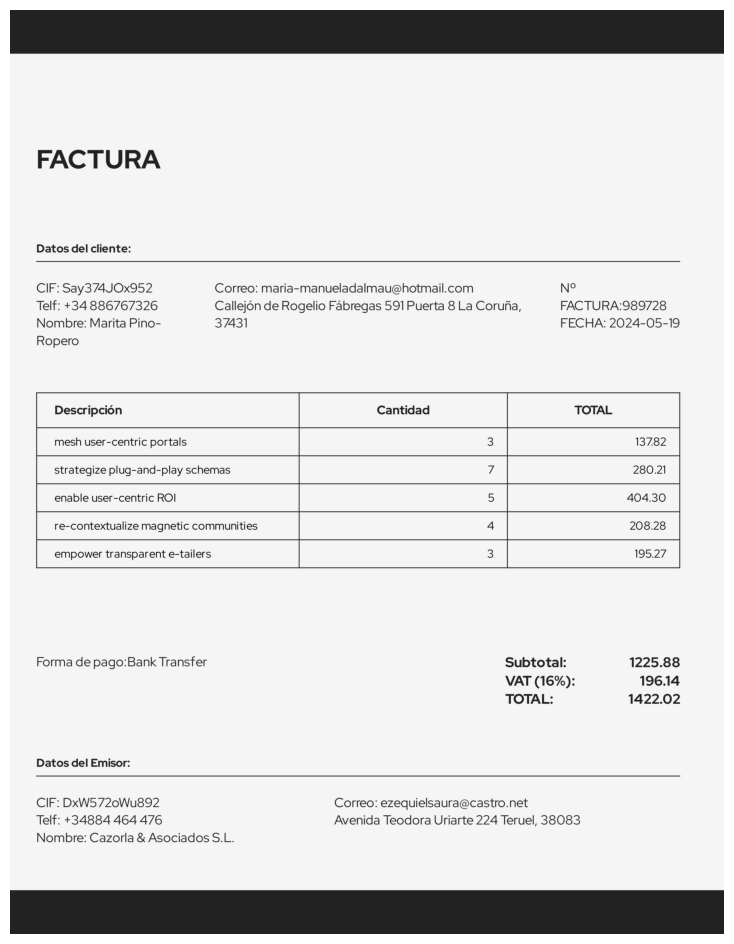

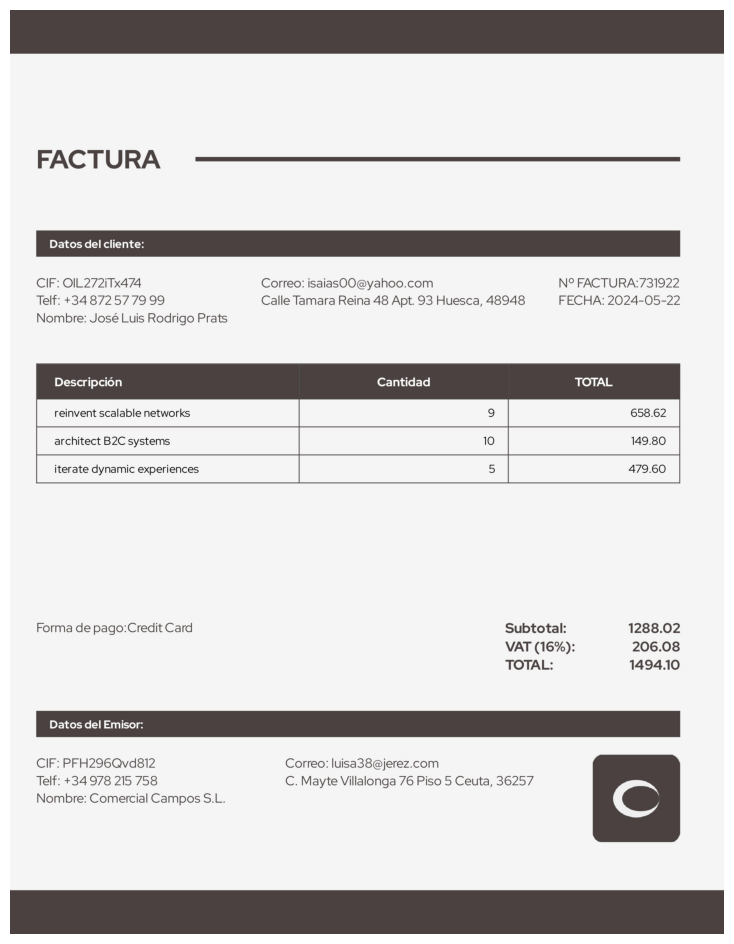

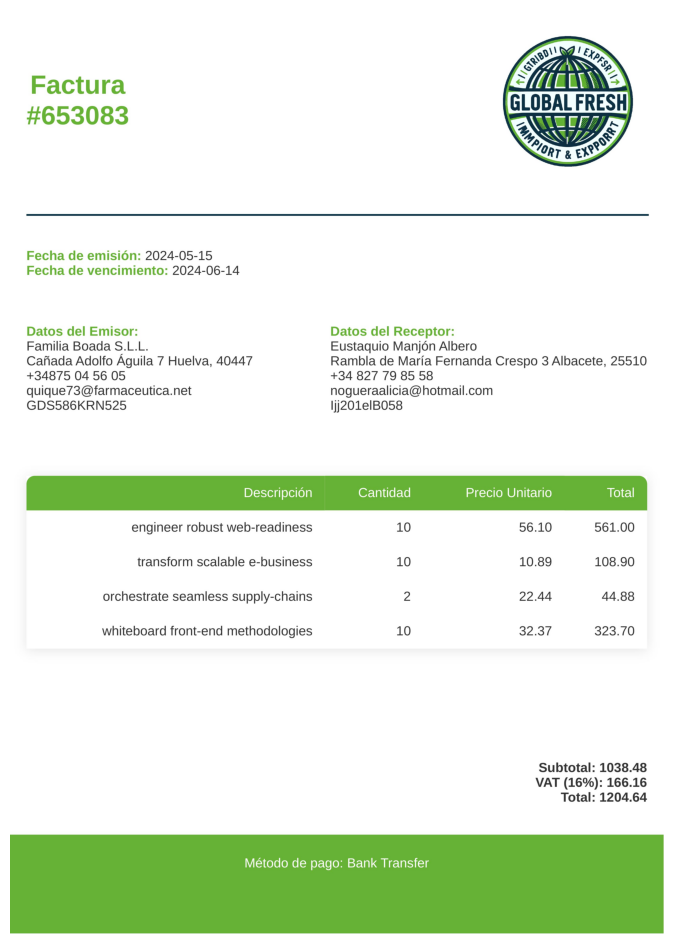

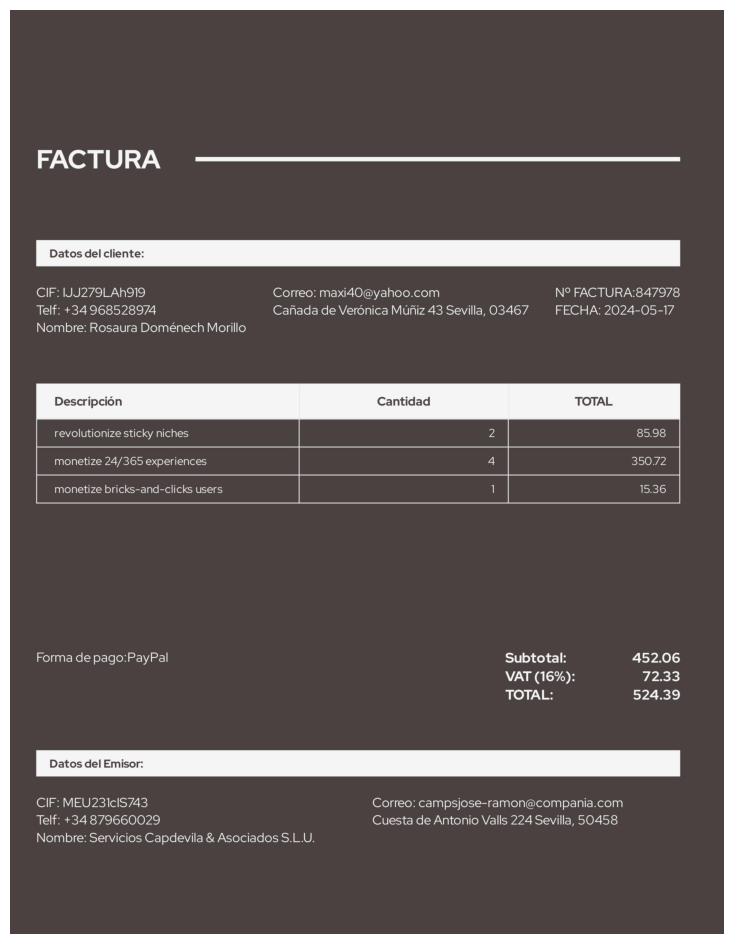

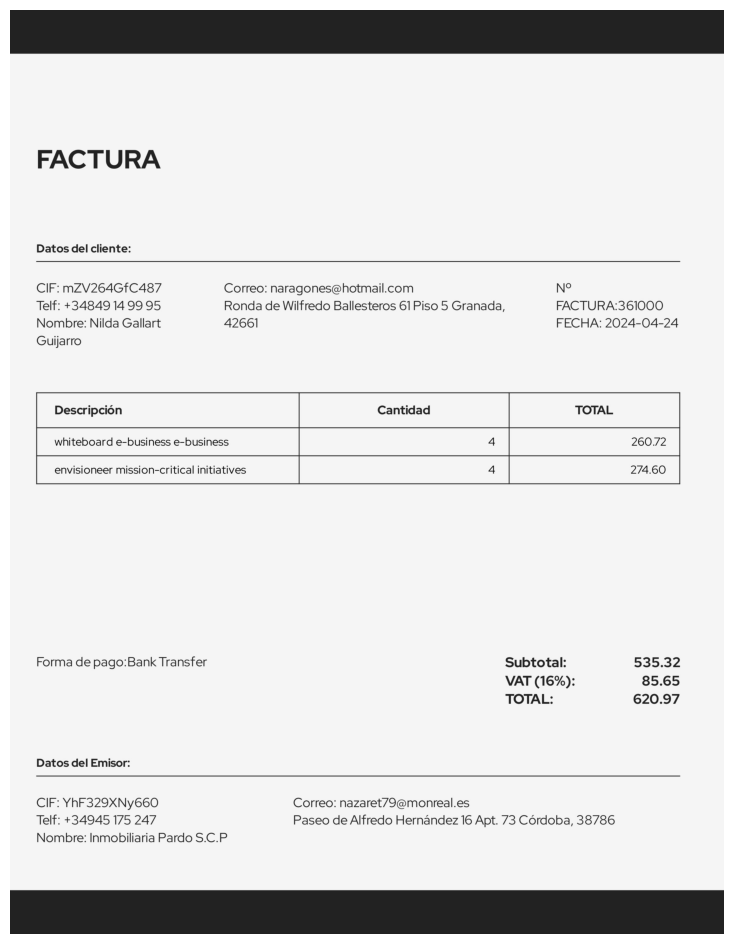

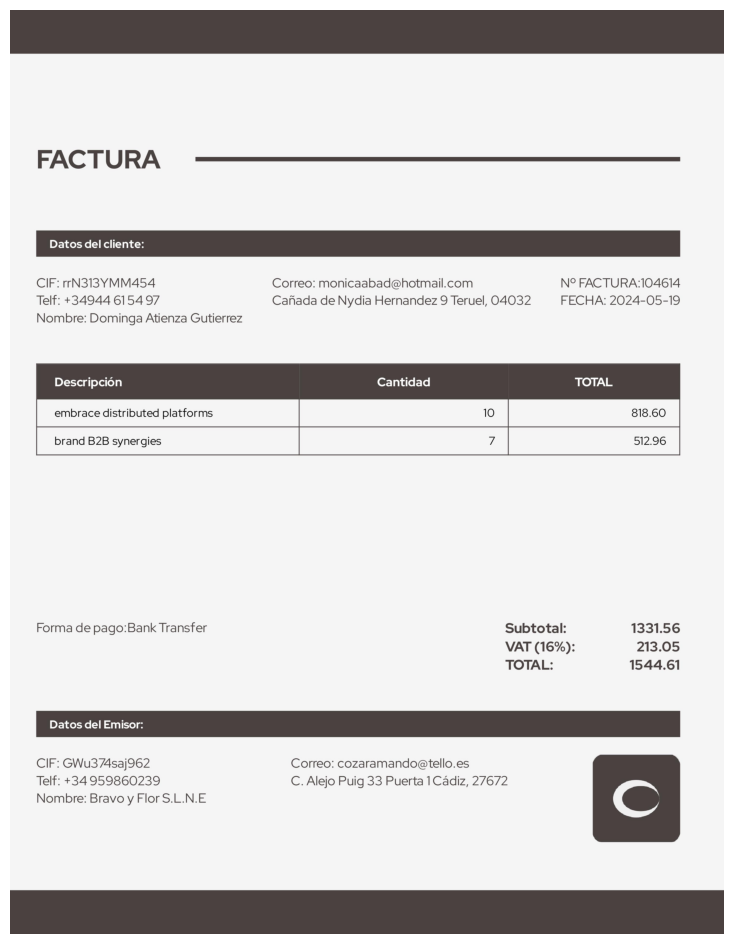

In [71]:
reader = easyocr.Reader(['en'], gpu=True)

for file in files:
    ##Pretratamiento de la imagen
    result = reader.readtext('facturas/' + file, paragraph=True, 
                             text_threshold=0.3, low_text=0.3, y_ths=0.4)

    image = cv2.imread('facturas/' + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.axis('off')



    #Unir el texto entero separado por lineas

    print(f"Texto de la imagen {file}")
    for (box, text) in result:
        print(text)
